#### TfidfVectorizer and CountVectorizer both are the methods of converting text data into vectors.

In CountVectorizer the number of times a word appears in the document are being counted. disadvantage is it's ignores some words which are present in a less number in the document. And combination of words dosen't have any existance. 

##### Let's take an example, 
if a 'not' is present in front of any positive word it's make the word negative. (I am not happy)


TfidfVectorizer considers overall document weightage(weights the word counts by a measure of how often they appear in the documents) of a word and morw over, It helps us in dealing with most frequent words. Using it we can penalize them.


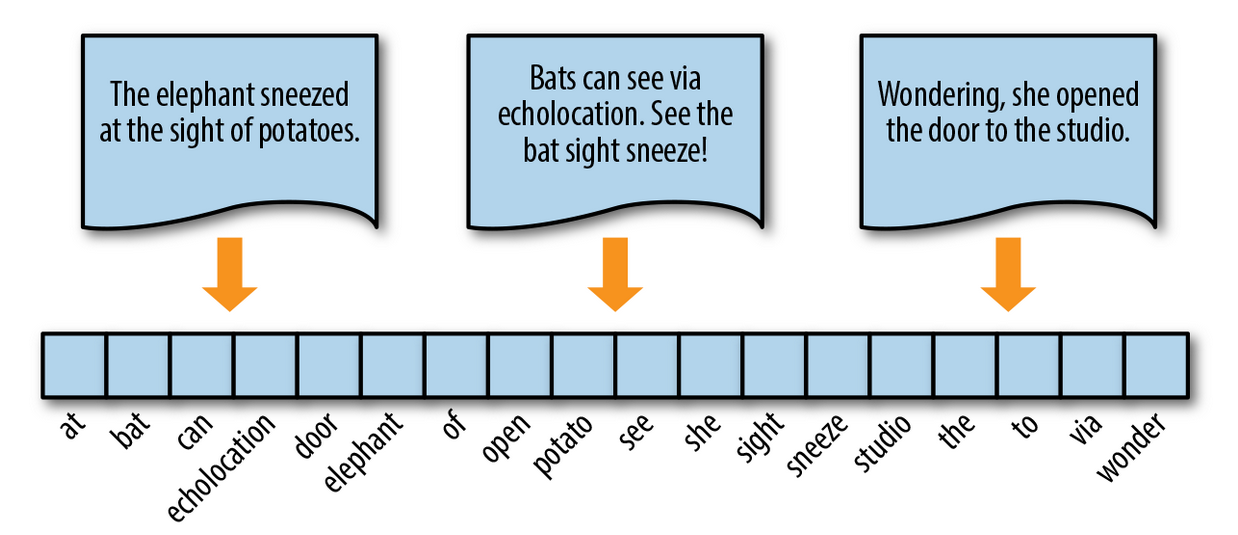


source : https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion/Emotion(angry).csv
/kaggle/input/emotion/Emotion(happy).csv
/kaggle/input/emotion/Emotion(sad).csv


In [2]:
sad = pd.read_csv('/kaggle/input/emotion/Emotion(sad).csv')
happy= pd.read_csv('/kaggle/input/emotion/Emotion(happy).csv')
angry=pd.read_csv('/kaggle/input/emotion/Emotion(angry).csv')

In [3]:
sad.shape

(635, 2)

In [4]:
happy.shape

(708, 2)

In [5]:
angry.shape

(696, 2)

In [6]:
sad.head()

content sentiment
0  Never hurt people who love you a lot, because ...       sad
1  Don’t expect me to tell you what you did wrong...       sad
2  I preferred walking away than fighting for you...       sad
3  Moving forward in life isn’t the hard part, it...       sad
4  Never cry for anyone in your life, because tho...       sad

In [7]:
sad = sad.drop_duplicates(subset='content', keep="first")

In [8]:
happy = happy.drop_duplicates(subset='content', keep="first")

In [9]:
angry = angry.drop_duplicates(subset='content', keep="first")

In [10]:
frames = [sad, happy, angry]

df = pd.concat(frames)

In [11]:
df.shape

(1592, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 0 to 694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    1592 non-null   object
 1   sentiment  1592 non-null   object
dtypes: object(2)
memory usage: 37.3+ KB


In [13]:
df.head()

content sentiment
0  Never hurt people who love you a lot, because ...       sad
1  Don’t expect me to tell you what you did wrong...       sad
2  I preferred walking away than fighting for you...       sad
3  Moving forward in life isn’t the hard part, it...       sad
4  Never cry for anyone in your life, because tho...       sad

In [14]:
df = df.drop_duplicates(subset='content', keep="first")

In [15]:
df.shape

(1586, 2)

In [16]:
df['sentiment'].value_counts()

happy    702
angry    494
sad      390
Name: sentiment, dtype: int64

## Replacing categorical values as :
     `happy ----> 1`
        
     `angry ----> 0`
        
     `sad   ----> 2`

In [17]:
df['sentiment'].replace({'happy':1,'angry':0,'sad':2},inplace=True)

In [18]:
df['sentiment'].value_counts()

1    702
0    494
2    390
Name: sentiment, dtype: int64

# Following basic steps are required for nlp :

## 1.Cleaning html tag
## 2.Converting to lower 
## 3.Remove special characters
## 4.Remove stop words
## 5.Perform stemming


In [19]:
## cleaning html tag

import re
def clean_html(text):
    
    clean = re.compile('<.*?>')
    return re.sub(clean, '',text)
    
df['content']=df['content'].apply(clean_html)

In [20]:
## converting to lower 

def convert_lower(text):
    return text.lower()

df['content']=df['content'].apply(convert_lower)



In [21]:
def remove_special(text):
        x=''
        for i in text:
            if i.isalnum():
                x=x+i
            else:
                x=x+' '
        return x

df['content']=df['content'].apply(remove_special)



In [22]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y
df['content']=df['content'].apply(remove_stopwords)

In [23]:
def join_back(list_input):
    return " ".join(list_input)
    

df['content']=df['content'].apply(join_back)



In [24]:
import nltk

from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
y=[]

def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z
df['content']=df['content'].apply(stem_words)


In [25]:
def joinback2(list_input):
    return "".join(list_input)
    


df['content']=df['content'].apply(joinback2)

In [26]:
df

content  sentiment
0    never hurt people love lot hurt back probably ...          2
1    expect tell wrong figure ready correct cos kno...          2
2    preferred walking away fighting worth fighting...          2
3    moving forward life hard part leaving behind s...          2
4    never cry anyone life cry deserve tears deserv...          2
..                                                 ...        ...
681  embarrassment anger biggest humiliation person...          0
685  strong man good wrestler strong man one contro...          0
687                          man big things make angry          0
693                    singing angry know punches face          0
694            telling someone calm makes much angrier          0

[1586 rows x 2 columns]

In [27]:
X=df['content']

In [28]:
X.shape

(1586,)

In [29]:
y=df.iloc[:,-1].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3) 

In [31]:
X_test.shape

(476,)

# 1.Using CountVectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)

In [33]:
X_train = cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [34]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [35]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

BernoulliNB()

In [36]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
print("Bernaulli",accuracy_score(y_test,y_pred3))

Gaussian 0.5294117647058824
Multinomial 0.7436974789915967
Bernaulli 0.6491596638655462


# Testing

In [38]:
test="i am sad & depressed too"

In [39]:
test = np.array([test])
test = cv.transform(test)

In [40]:
clf2.predict(test)

array([2])

In [41]:
X1=df['content']
y=df.iloc[:,-1].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X1,y,test_size=0.3) 

# 2.Usiing TfidfVectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df= 1, max_features=1500, strip_accents='unicode',analyzer='word',ngram_range=(1,3),stop_words='english')

In [44]:
X_train = tv.fit_transform(X_train).toarray()
X_test = tv.transform(X_test).toarray()

In [45]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [46]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [47]:
print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
print("Bernaulli",accuracy_score(y_test,y_pred3))

Gaussian 0.5462184873949579
Multinomial 0.6554621848739496
Bernaulli 0.5798319327731093


In [48]:
test="just go to jail"

In [49]:
test = np.array([angry['content'][0]])
test = tv.transform(test)

In [50]:
clf2.predict(test)

array([0])